# 비정상 절차서 64-03 : 주증기관 차단

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

## 1.0 데이터 처리

In [2]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/1.All_python_project/New_CNS_db/ab64_03_1_(73).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 4:deque(maxlen=5), 5:deque(maxlen=5)}

## 2.0 경보 및 증상

### 2.1 MSIS MAIN VALVES TRN A,B ACTUATED(RL-QL-4A) 

### 2.2 밸브차단에 의해 다음 경보 발생
- LOOP 1, 2, 3 STEAM PRESS RATE HIGH(RK-UA-912, 913, 914-A2)
- SG 1, 2, 3 WATER LEVEL LOW(RK-UA-912, 913, 914-D1)
- SG 1, 2, 3 WATER LEVEL LOW-LOW(RK-UA-912, 913, 914-E1)
- SG 1, 2, 3 STM/FW FLOW DEVIATION(RK-UA-912, 913, 914-E2)

LOOP 1, 2, 3 STEAM PRESS RATE HIGH(RK-UA-912, 913, 914-A2)
=> 관련변수 찾지 못함

SG 1, 2, 3 WATER LEVEL LOW(RK-UA-912, 913, 914-D1)

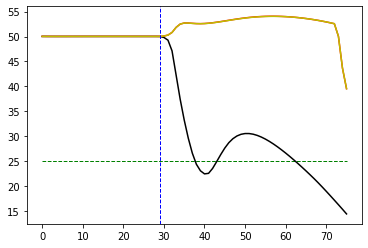

In [4]:
# CZSGW : 증기발생기 수위 저 SETPOINT [0-1]
# ZINST78 : 증기발생기 1LOOP 수위
# ZINST77 : 증기발생기 2LOOP 수위
# ZINST76 : 증기발생기 3LOOP 수위
plt.plot(db['CZSGW']*100, color='g', linestyle='--', linewidth=1)
plt.plot(db['ZINST78'], color='k')
plt.plot(db['ZINST77'], color='r')
plt.plot(db['ZINST76'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

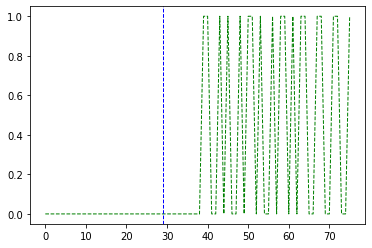

In [5]:
# KLAMPO319': 알람 SG 1,2,3 level lo
plt.plot(db['KLAMPO319'], color='g', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [6]:
sg_level = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST78'][i] < db['CZSGW'][i]*100 or db['ZINST77'][i] < db['CZSGW'][i]*100 or db['ZINST76'][i] < db['CZSGW'][i]*100:
            sg_level.append(i+1)
if len(sg_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : {sg_level[0]}초')

최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : 39초


SG 1, 2, 3 WATER LEVEL LOW-LOW(RK-UA-912, 913, 914-E1)

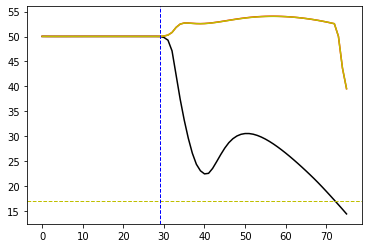

In [7]:
# ZINST78 : 증기발생기 1LOOP 수위
# ZINST77 : 증기발생기 2LOOP 수위
# ZINST76 : 증기발생기 3LOOP 수위
plt.plot(db['ZINST78'], color='k')
plt.plot(db['ZINST77'], color='r')
plt.plot(db['ZINST76'], color='y')
sg_level_low_point = plt.axhline(17, color='y', linestyle='--', linewidth=1) #low-low 기준 17%
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [8]:
sg_level_lolo = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST78'][i] < 17 or db['ZINST77'][i] < 17 or db['ZINST76'][i] < 17:
            sg_level_lolo.append(i+1)
if len(sg_level_lolo) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : {sg_level_lolo[0]}초')

최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : 74초


SG 1, 2, 3 STM/FW FLOW DEVIATION(RK-UA-912, 913, 914-E2

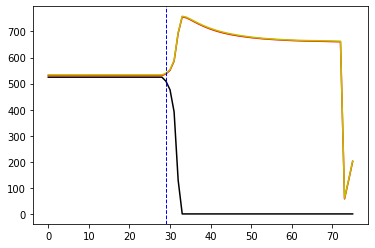

In [10]:
# WSTM1 : 증기 유량1
# WSTM2 : 증기 유량2
# WSTM3 : 증기 유량3
plt.plot(db['WSTM1'], color='k')
plt.plot(db['WSTM2'], color='r')
plt.plot(db['WSTM3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
print()

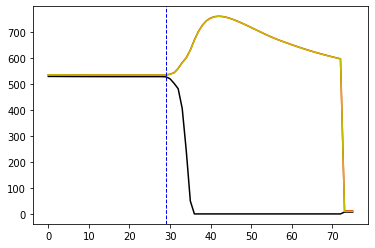

In [11]:
# WFWLN1 : 급수 유량1
# WFWLN2 : 급수 유량2
# WFWLN3 : 급수 유량3
plt.plot(db['WFWLN1'], color='k')
plt.plot(db['WFWLN2'], color='r')
plt.plot(db['WFWLN3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

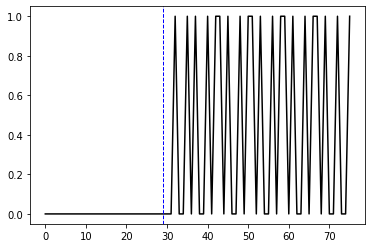

In [12]:
# KLAMPO320 :ALARM: SG 1,2,3 STM/FW FLOW DEVIATION(10% OF LOOP FLOW) 
plt.plot(db['KLAMPO320'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [13]:
deviation_alarm = []
# deviation setpioint
RSTFWD = {1:db['WSTM1'] * 0.1,
          2: db['WSTM2'] * 0.1,
          3: db['WSTM3'] * 0.1}
for i in range(len(db)):
    if i > 29:
        if abs(db['WSTM1'][i] - db['WFWLN1'][i]) > abs(RSTFWD[1][i]) or abs(db['WSTM2'][i] - db['WFWLN2'][i]) > abs(RSTFWD[2][i]) or abs(db['WSTM3'][i] - db['WFWLN3'][i]) > abs(RSTFWD[3][i]):
            deviation_alarm.append(i+1)
if len(deviation_alarm) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초‘SG STM/FW FLOW DEVIATION’경보 발생(±10 %) 시간 : {deviation_alarm[0]}초')

최초‘SG STM/FW FLOW DEVIATION’경보 발생(±10 %) 시간 : 32초


## 3.0 자동 동작사항

### 3.1 격납건물 1단계 차단신호(CIS-A)에 의해 동작되는 밸브들(붙임 6.4)이 자동 	차단

해당 사항 확인 불가

## 4.0 긴급조치사항

### 4.1 주증기관 차단신호에 의해 동작되는 밸브들이 자동차단 되었는지 확인

### 4.2 자동차단이 되지 않은 밸브가 있으면 수동으로 차단